<a href="https://colab.research.google.com/github/jcowart1987/SalesPredictions/blob/main/DataCleanedandVisualizedJC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

Part 1
Jon Cowart











##Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sales_predictions.csv')


##Data Cleaning

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#1 How many rows and columns?
#There are 12 columns and 8523 rows
#2What are the data types of each variable?
#Item_Identifier is an object, Item_Weight is a float, Itam_Fat_content is an object,
#Item_visibility is a float, item_type is an object, item_MRP is a float, Outlet identifier is an object,
#Outlet est. year is integer, outlet size is object, outlet location type is object, outlet type is object,
#item outlet sales is a float

#3 Are there any duplicates? Drop any duplicates.
df.duplicated().any() #No, there are no duplicates

False

In [ ]:
#4 Identify missing values
df.isna().sum()
#Item weight has 1463 missing values, and outlet size has 2410 missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#5 Decide what to do with the missing values and explain your choice.
#I decided to fill outlet size with "missing", because there are 2 other columns that should tell us the size
# (those are outlset type and outlet location type. I'm assuming Tier 1,2,3 refers to size)

#I decided to use the average weight of all objects to replace the missing item weights, because the range of weight
#doesn't seem to be extreme, since the average is 12.85, so doing this should skew the data too much.
mean_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(value = mean_weight, inplace=True)
df['Outlet_Size'].fillna(value = 'missing', inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
#6 Confirm that there are no missing values.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
#7Find and fix and inconsistent categories of data.
df['Item_Fat_Content'].value_counts()
df.replace(['LF', 'reg', 'low fat'], ['Low Fat', 'Regular', 'Low Fat'], inplace=True)
df['Item_Outlet_Sales'].value_counts() #Here, I kept replacing the column in the brackets, but I didnt
#find anything else that needed to be fixed.


958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [ ]:
#8For any numerical columns, obtain the summary stats of each (min, max, mean)
df.mean()
df.min()
df.max()

#means: Item Weight: 12.85, Item Visibility: 0.06, Item MRP: 140.99, Outlet Establishment Year: 1997 Item Outlet Sales: 2181
#mins: Item Weight: 4.55, Item Vis: 0.0, Item MRP: 31.29, Outlet Est Year: 1985, Item Outlet Sales: 33.29
#maxs: Item Weight: 21.25, Item Vis: .32, Item MRP: 266.888, Outlet Est Year: 2009, Item Outlet Sales: 13086

<ipython-input-11-981ae169522d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Item_Identifier                          NCZ54
Item_Weight                              21.35
Item_Fat_Content                       Regular
Item_Visibility                       0.328391
Item_Type                        Starchy Foods
Item_MRP                              266.8884
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 2009
Outlet_Size                            missing
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                   13086.9648
dtype: object

##Exploratory Visuals

In [ ]:
#Histogram View of Outlet Type and Item Outlet Sales

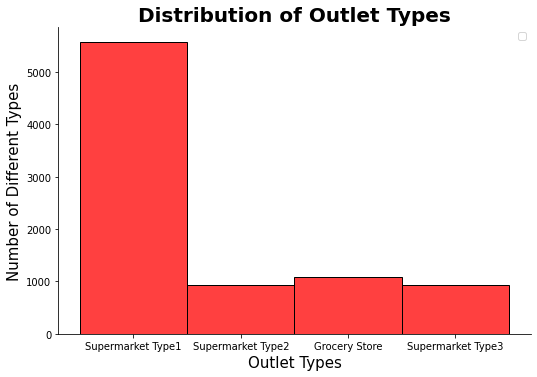

In [ ]:
OT = sns.displot(data=df, x='Outlet_Type', aspect = 1.5, color='red');
OT.ax.set_title('Distribution of Outlet Types', fontsize = 20, fontweight = 'bold')
OT.ax.set_xlabel('Outlet Types', fontsize = 15)
OT.ax.set_ylabel('Number of Different Types', fontsize =15)
OT.ax.legend()

The vast majority of outlet types from this data set are Supermarket Type 1.

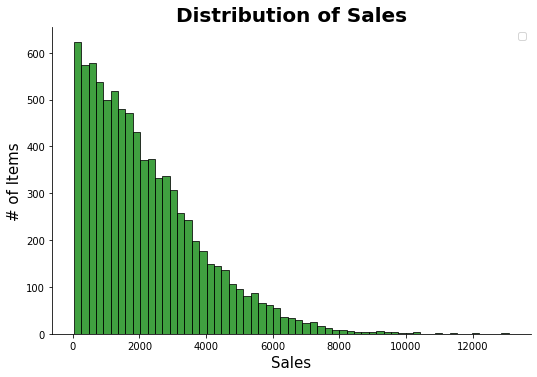

In [ ]:
IS = sns.displot(data=df, x='Item_Outlet_Sales', aspect = 1.5, color='green');
IS.ax.set_title('Distribution of Sales', fontsize = 20, fontweight = 'bold')
IS.ax.set_xlabel('Sales', fontsize = 15)
IS.ax.set_ylabel('# of Items', fontsize =15)
IS.ax.legend()

<AxesSubplot:xlabel='Item_Outlet_Sales'>

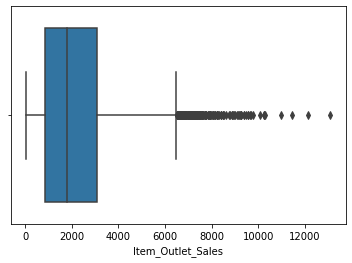

In [ ]:
sns.boxplot(data=df, x = 'Item_Outlet_Sales')

There are extreme outliers for sales after the quartile range.

<AxesSubplot:>

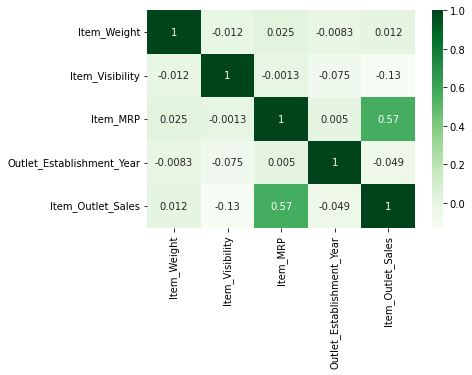

In [ ]:
#Heatmap of the correlation between features Item Size and Sales
df.head()
corr = df.corr()
sns.heatmap(corr, cmap='Greens', annot=True)

There is a moderate positive correlation between Item MRP and Item Sales. 

##Explanatory Visuals

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


What affects sales the most?

Text(0.5, 1.0, 'Sales by Outlet Type')

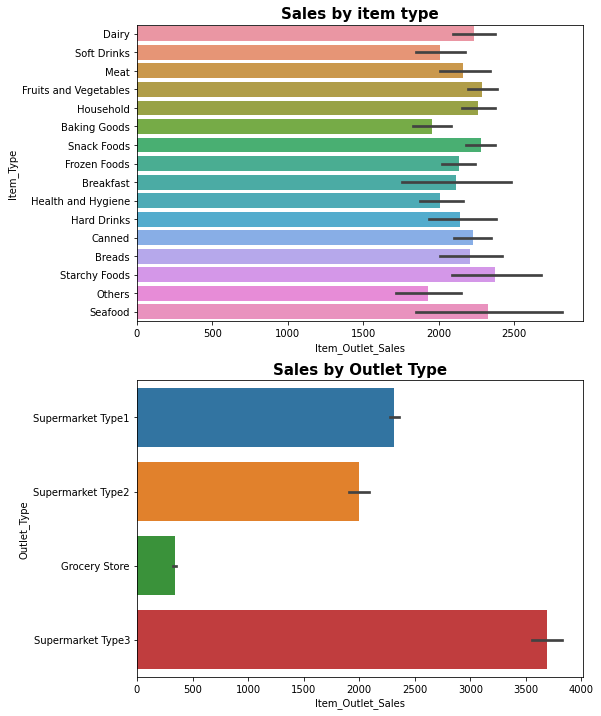

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize = (8,12))

sns.barplot (data=df, x='Item_Outlet_Sales', y='Item_Type', ax = axes[0])
axes[0].set_title('Sales by item type', fontsize=15, fontweight='bold')

sns.barplot (data=df, x='Item_Outlet_Sales', y='Outlet_Type', ax = axes[1])
axes[1].set_title('Sales by Outlet Type', fontsize=15, fontweight='bold')






Supermarkets labeled as Type 3 sell more items than any other. Grocery stores sell the fewest amount of items. 

Dairy and Seafood are the highest sold items. 
Baking goods are the lowest sold items.